# Uvod u analizu podataka: 1. domaća zadaća 

Ucitavam dataset preuzet sa web-a: https://www.kaggle.com/datasets/joshuanaude/effects-of-alcohol-on-student-performance i potrebne biblioteke za daljni rad sa podatcima. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
path = '/Users/valentinavidovic/Documents/alcohol-student_performance.csv'
df = pd.read_csv(path)
df.head()

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


Ispisujem osnovne informacije o podatcima kako bih vidjela sve varijable koje sadrže i eventualne greške

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          406 non-null    object 
 1   Your Sex?                                                                                          404 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          399 non-null    object 

## Čišćenje podataka

### Brisanje svih studenata koji su 2023 godine bili u srednjoj školi

U napomeni na web stranice s koje su preuzeti podatci napisano je:"You will see some responses on "what year were you in last year" have been left blank which indicates that the students previous year of study was not in university but rather high school. Since the point of the model is to be based on university students, these observations that have been left blank will be removed so that only students who were in university in 2023 and onwards are taken into consideration." Iz tog razloga ćemo izbrisati sve unose za koje je godina studiranja null funkcijom notna().

In [4]:
df = df[df['What year were you in last year (2023) ?'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          333 non-null    object 
 1   Your Sex?                                                                                          333 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         330 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          329 non-null    object 
 5  

### Brisanje svih unosa gdje studenti nisu unjeli gpa

In [5]:
df = df[df['Your Matric (grade 12) Average/ GPA (in %)'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          330 non-null    object 
 1   Your Sex?                                                                                          330 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         330 non-null    float64
 3   What year were you in last year (2023) ?                                                           330 non-null    object 
 4   What faculty does your degree fall under?                                                          326 non-null    object 
 5  

### Brisanje svih unosa gdje studenti nisu odgovorili na pitanje How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)

In [6]:
df = df[df['How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          329 non-null    object 
 1   Your Sex?                                                                                          329 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         329 non-null    float64
 3   What year were you in last year (2023) ?                                                           329 non-null    object 
 4   What faculty does your degree fall under?                                                          325 non-null    object 
 5  

Korištenjem funkcije unique ispisujem sve vrijednosti koje postiže varijabla 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)'

In [7]:
df['How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)'].unique()

array(['3', '4+', '2', '1', '0'], dtype=object)

## Kreiranje nove tablice sa relevantnim podatcima i provjera ispravnosti podataka

Promatrat ću varijable GPA i broj izlazaka u tjednu, pa ću radi jednostavnosti napraviti novu tablicu sa te dvije varijable i vrijednosti iz How often do you go out partying/socialising during the week? pretvoriti iz tipa object u int (za studente ciji je odgovor 4+ stavit ću 4), to radim funkcijom str.replace

In [8]:
ndf = df[['Your Matric (grade 12) Average/ GPA (in %)', 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)']].rename(columns={
    'Your Matric (grade 12) Average/ GPA (in %)': 'gpa',
    'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)': 'days'
})
ndf.head()

,gpa,days
0,76.0,3
1,89.0,4+
2,76.0,3
3,89.0,2
4,74.0,1


In [9]:
ndf['days'] = ndf['days'].str.replace('+', '')
ndf.head()

,gpa,days
0,76.0,3
1,89.0,4
2,76.0,3
3,89.0,2
4,74.0,1


In [10]:
ndf['days'] = ndf['days'].astype(int)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, 0 to 405
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gpa     329 non-null    float64
 1   days    329 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.7 KB


In [11]:
ndf['gpa'].unique()

array([76.  , 89.  , 74.  , 80.  , 85.  , 79.  , 72.  , 87.  , 69.  ,
       73.  , 83.  , 78.  , 84.  , 86.  , 99.  , 82.6 , 65.  , 81.  ,
       88.  , 75.  , 70.  , 98.  , 90.  , 98.33, 82.  , 77.  , 68.  ,
       92.  , 91.86, 71.  , 63.  , 67.  , 60.  , 95.  , 86.4 , 95.5 ,
       94.  , 66.  , 55.  , 64.  ])

In [12]:
ndf['days'].unique()

array([3, 4, 2, 1, 0])

## Statistički opis varijabli

Funkcijom describe racunam broj ne nul vrijednosti u svakoj koloni, srednju vrijednost, std, minimum, percentile (Q1, mod i Q3) i maximum

In [13]:
ndf.describe()

,gpa,days
count,329.000000,329.000000
mean,78.047690,0.987842
std,6.671662,1.241988
min,55.000000,0.000000
25%,74.000000,0.000000
50%,78.000000,0.000000
75%,83.000000,2.000000
max,99.000000,4.000000


## Grafički prikaz točkastim diagramom

Za crtanje tockastog dijagrama koristim plt.scatter iz mathplotlib, funkcijom .figure kreiram novi prozor u kojem ce se nalaziti dijagram.

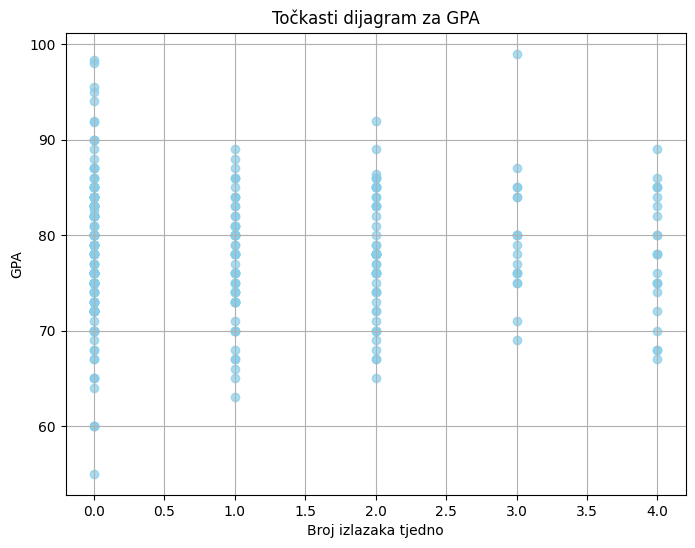

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(ndf['days'], ndf['gpa'], color='skyblue', alpha=0.7)
plt.title('Točkasti dijagram za GPA')
plt.xlabel('Broj izlazaka tjedno')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

## Kovarijanca i korelacija

Koristim funkcije za racunanje kovarijance i korelaicje iz numpy biblioteke.

In [15]:
np.cov(ndf['days'], ndf['gpa'])

array([[ 1.54253466,  0.12591695],
       [ 0.12591695, 44.51106782]])

In [16]:
np.corrcoef(ndf['days'], ndf['gpa'])

array([[1.        , 0.01519612],
       [0.01519612, 1.        ]])

Iz provedene analize možemo zaključiti da studenti, u prosjeku, izlaze jednom tjedno te da broj izlazaka tjedno nije u korelaciji sa njihovim uspjehom na fakultetu. Iz tog razloga upotrijebit ću neki drugi set podataka kako bih mogla napraviti linearnu regresiju na prikladnijim podatcima

# Dataset 2

Dataset 2 sadrži ocjene iz matematike učenika nekih dviju srednjih škola u Portugalu. Varijable na koje ću se fokusirati su G1 i G2, tj. ocjena na kraju prvog i drugog polugodišta. Ocjene postižu vrijednosti od 0 do 20. Dataset je preuzet sa https://www.kaggle.com/datasets/ishandutta/student-performance-data-set

In [17]:
path = '/Users/valentinavidovic/Documents/student-mat.csv'
df = pd.read_csv(path, sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [18]:
df2['G1'].unique()

NameError: name 'df2' is not defined

In [ ]:
df2['G2'].unique()

## Koeficjent korelacije

In [ ]:
np.corrcoef(df2['G1'], df2['G2'])

Zaključujemo da su podatci značajno pozitivno korelirani, što je očekivano jer se radi o ocjenama istog učenika u prvom i drugom dijelu godine

## Grafički prikaz točkastim dijagramom

In [ ]:
plt.figure(figsize=(8, 6))  # Postavi veličinu figure
plt.scatter(df2['G1'], df2['G2'], color='skyblue', alpha=0.7)
plt.title('Točkasti dijagram ocjena iz matematike')
plt.xlabel('Prvo polugodište')
plt.ylabel('Drugo polugodište')
plt.grid(True)
plt.show()

Promotrimo podatke koji imaju 0 u stupcu G2

## Čišćenje podataka

In [ ]:
df0 = df2[df2['G2']==0]
df0.head(13)

Iz tablice smo izbrisali sve podatke za koje je vrijedilo G2 = 0, jer ih smatram pogrešnima

In [ ]:
df2 = df2[df2['G2'] != 0]
df.info()

In [ ]:
plt.figure(figsize=(8, 6))  # Postavi veličinu figure
plt.scatter(df2['G1'], df2['G2'], color='skyblue', alpha=0.7)
plt.title('Točkasti dijagram ocjena iz matematike')
plt.xlabel('Prvo polugodište')
plt.ylabel('Drugo polugodište')
plt.grid(True)
plt.show()

In [ ]:
X = df2[['G2']]
y = df2['G1'] 

In [ ]:
model = LinearRegression()
model.fit(X, y)

print("Koeficijent nagiba:", model.coef_[0])
print("Intercept:", model.intercept_)

In [ ]:
plt.scatter(df2['G1'], df2['G2'], color='skyblue', alpha=0.7)
a = model.coef_[0]
b = model.intercept_

x_values = np.linspace(min(df2['G1']), max(df2['G2']), 100)
y_values = a * x_values + b

plt.plot(x_values, y_values, color='red', label=f'Linearna regresija: y = {a:.2f}x + {b:.2f}')